In [137]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [138]:
ds = load_breast_cancer()
X, y = ds.data, ds.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [139]:
# Pipeline => 1. Standard Scaler => scaled data goes to GridSearchCV then it searches
# the best params so 2. GridSearchCV and then the parameters we get will be used in 3. SVC
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [140]:
clf = SVC()
param_grid=clf.get_params()
print("Params available: ", param_grid)
param_grid = {
    'C': np.array([1.0, 0.1, 0.01, 0.15]),
    'degree': np.array([1, 2, 3]),
    'gamma': np.array([0, 1]),
    'kernel': np.array(['rbf', 'sigmoid', 'linear', 'poly'])
}
print("\nBefore Changing: ", param_grid)
gs = GridSearchCV(estimator=clf, param_grid=param_grid)
gs = gs.fit(X_scaled, y)
param_grid = gs.best_params_
print("\nBest params: ", param_grid)

Params available:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Before Changing:  {'C': array([1.  , 0.1 , 0.01, 0.15, 0.05]), 'degree': array([1, 2, 3]), 'gamma': array([0, 1]), 'kernel': array(['rbf', 'sigmoid', 'linear', 'poly'], dtype='<U7')}

Best params:  {'C': 0.05, 'degree': 1, 'gamma': 0, 'kernel': 'linear'}


In [141]:
clf = clf.set_params(**param_grid)
clf.fit(X_scaled, y)
score = clf.score(X_scaled, y)
print("Accuracy Score: ", score*100, "%")
support_vecs = clf.support_vectors_

Accuracy Score:  98.24253075571178 %


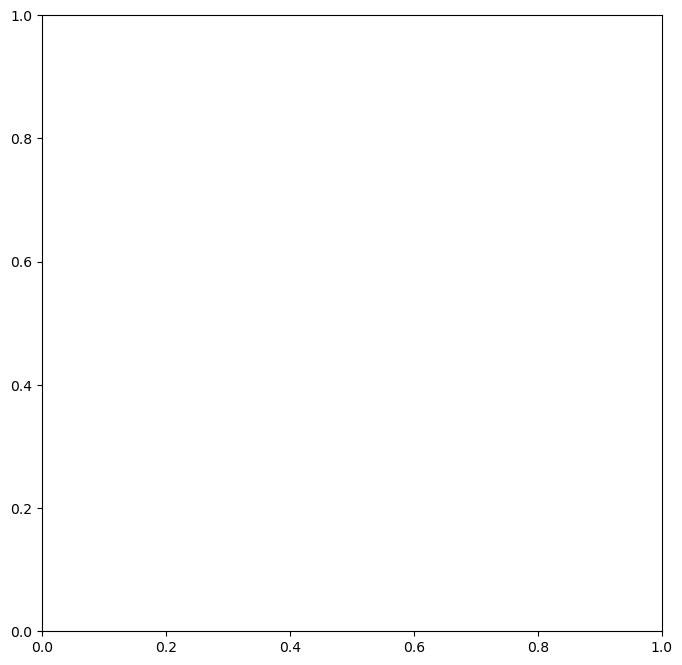

In [142]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

plt.show()